
   


# MIT DATATHHON CHALLENGE COVID




In [175]:
import pandas as pd
import numpy  as np
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [176]:
pd.set_option('display.max_columns', None)
final_dataset  = pd.read_csv('final_dataset.csv') 

## Regression goal
Our regression goal is to predict the number of cases on any given day.

y = the vector of cases counts seen on days 1 through n. 

Thus y = [y_1, y_2, y_3,…,y_n]. 

y_i is the number of bicyclists on day i.

X = the matrix of predictors a.k.a. regressors a.k.a explanatory variables a.k.a. regression variables. 

The size of matrix X is a (n x m) since there are n independent observations (rows) in the data set and each row contains values of m explanatory variables.


λ = the vector of event rates. The vector λ is a primary characteristic of count based data sets. λ is a vector of size (n x 1). 

It contains n rates [λ_0, λ_1, λ_2,…,λ_n], corresponding to the n observed counts in the counts vector y. 

The rate λ_i for observation ‘i’ is assumed to drive the actual observed count y_i in the counts vector y. The λ column is not present in the input data.

Instead, λ vector is a deduced variable that is calculated by the regression model during the training phase.

For the bicyclist counts data, each one of the λ_i values is defined as the number of cases in ‘unit’ time on day i. Unit time can be 1 second, 1 hour, 1 day, 1 week — whatever unit time interval we want to measure the rate over. This rate λ_i is assumed to drive the observed count of bicyclists y_i on day i.

### The training algorithm of the Negative Binomial regression model will fit the observed counts y to the regression matrix X.

#### Recollect that the Negative Binomial regression model does not make the variance = mean assumption that the Poisson regression model does.


### NB model requires us to define a new parameter α which it uses to express the variance in terms of the mean as follows



<img src="https://miro.medium.com/max/876/1*Euxgqf9GsKYNQymurPx3fw.png"/>


- When p = 1: 



<img src="https://miro.medium.com/max/836/1*m8Hh0cF_m8gt5VK5m8KrwA.png"/>



- When p=2: 

<img src="https://miro.medium.com/max/864/1*NIqqLpTXfym3zba-7D44NA.png"/>

Then The p=2 case is referred to as the NB2 model. 


In [177]:
final_dataset.head()

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases
0,44001,29/03/2020,425,511,Bristol,Rhode Island,11,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,1,83.170258,11
1,44001,05/04/2020,432,513,Bristol,Rhode Island,25,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,2,84.210526,14
2,44001,12/04/2020,416,494,Bristol,Rhode Island,39,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,3,84.210526,14
3,44001,19/04/2020,427,516,Bristol,Rhode Island,65,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,4,82.751938,26
4,44001,26/04/2020,444,522,Bristol,Rhode Island,111,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,5,85.057472,46


In [178]:
final_dataset.tail()

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases
60,9015,29/04/2020,906,1089,Windham,Connecticut,7,0,Wndham,116538,44449,41.3,64774,58978.0,18257.0,96795.0,2084,1552.0,13368.0,66,95.0,11691.0,9192.0,1,83.195595,7
61,9015,05/04/2020,898,1085,Windham,Connecticut,32,1,Wndham,116538,44449,41.3,64774,58978.0,18257.0,96795.0,2084,1552.0,13368.0,66,95.0,11691.0,9192.0,2,82.764977,25
62,9015,12/04/2020,894,1073,Windham,Connecticut,66,1,Wndham,116538,44449,41.3,64774,58978.0,18257.0,96795.0,2084,1552.0,13368.0,66,95.0,11691.0,9192.0,3,83.317802,34
63,9015,19/04/2020,926,1117,Windham,Connecticut,100,2,Wndham,116538,44449,41.3,64774,58978.0,18257.0,96795.0,2084,1552.0,13368.0,66,95.0,11691.0,9192.0,4,82.900627,34
64,9015,26/042020,929,1128,Windham,Connecticut,157,4,Wndham,116538,44449,41.3,64774,58978.0,18257.0,96795.0,2084,1552.0,13368.0,66,95.0,11691.0,9192.0,5,82.358154,57


In [179]:
#final_dataset.info()

In [180]:
final_dataset.date.unique()

array(['29/03/2020', '05/04/2020', '12/04/2020', '19/04/2020',
       '26/04/2020', '29/04/2020', '19/042020', '12/042020', '26/042020'],
      dtype=object)

In [181]:
final_dataset['date']= pd.to_datetime(final_dataset['date'], errors='coerce') 
#final_dataset['date'] = final_dataset['date'].astype('datetime64[ns]')

In [182]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   countyfips              65 non-null     int64         
 1   date                    62 non-null     datetime64[ns]
 2   super_spreader          65 non-null     int64         
 3   total_businesses        65 non-null     int64         
 4   county                  65 non-null     object        
 5   state                   65 non-null     object        
 6   cases                   65 non-null     int64         
 7   deaths                  65 non-null     int64         
 8   county_name             65 non-null     object        
 9   population              65 non-null     int64         
 10  households              65 non-null     int64         
 11  age                     65 non-null     float64       
 12  income                  65 non-null     int64       

### STEP1: fitting the Poisson regression mode

In [183]:


final_dataset['MONTH'] = final_dataset['date'].dt.month
final_dataset['DAY_OF_WEEK'] = final_dataset['date'].dt.dayofweek
final_dataset['DAY'] = final_dataset['date'].dt.day
final_dataset['YEAR'] = final_dataset['date'].dt.year

In [184]:
final_dataset.columns

Index(['countyfips', 'date', 'super_spreader', 'total_businesses', 'county',
       'state', 'cases', 'deaths', 'county_name', 'population', 'households',
       'age', 'income', 'females', 'over65', 'white', 'black', 'asian',
       'hispanic', 'amerindian', 'other', 'poverty', 'no_hsdiploma', 't',
       'super_spreader_density', 'daily_cases', 'MONTH', 'DAY_OF_WEEK', 'DAY',
       'YEAR'],
      dtype='object')

In [185]:
final_dataset.head(2)

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases,MONTH,DAY_OF_WEEK,DAY,YEAR
0,44001,2020-03-29,425,511,Bristol,Rhode Island,11,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,1,83.170258,11,3.0,6.0,29.0,2020.0
1,44001,2020-05-04,432,513,Bristol,Rhode Island,25,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,2,84.210526,14,5.0,0.0,4.0,2020.0


In [186]:
final_dataset.head(2)

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases,MONTH,DAY_OF_WEEK,DAY,YEAR
0,44001,2020-03-29,425,511,Bristol,Rhode Island,11,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,1,83.170258,11,3.0,6.0,29.0,2020.0
1,44001,2020-05-04,432,513,Bristol,Rhode Island,25,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,2,84.210526,14,5.0,0.0,4.0,2020.0


In [187]:
mask = np.random.rand(len(final_dataset)) < 0.8
final_dataset_train = final_dataset[mask]
final_dataset_test = final_dataset[~mask]
print('Training data set length='+str(len(final_dataset_train)))
print('Testing data set length='+str(len(final_dataset_test)))

Training data set length=54
Testing data set length=11


In [188]:
final_dataset_test.head(2)

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases,MONTH,DAY_OF_WEEK,DAY,YEAR
2,44001,2020-12-04,416,494,Bristol,Rhode Island,39,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,3,84.210526,14,12.0,4.0,4.0,2020.0
14,9003,2020-04-26,8487,9973,Hartford,Connecticut,4989,579,Hartford,894730,349064,40.4,72321,460080.0,147260.0,553425.0,114565,46327.00000,157785.0,1398,2673.0,97063.0000,65169.9960,5,85.099770,1638,4.0,6.0,26.0,2020.0


In [189]:
from patsy import dmatrices, dmatrix, demo_data

In [190]:
expr = """daily_cases ~ DAY + DAY_OF_WEEK + MONTH + population +  households + age + income +  females + over65 + white +  black  + asian + hispanic + 

amerindian +  other +  poverty +  no_hsdiploma + super_spreader_density """

In [191]:
y_train, X_train = dmatrices(expr, final_dataset_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, final_dataset_test, return_type='dataframe')


In [192]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [193]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            daily_cases   No. Observations:                   51
Model:                            GLM   Df Residuals:                       34
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.9
Date:                Fri, 15 May 2020   Deviance:                       5124.1
Time:                        17:46:45   Pearson chi2:                 4.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.91

In [194]:
##  λ vector  
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))
print(type(poisson_training_results.mu))


[  23.79620265   13.69147513   42.9582616    16.55406062 1827.06986428
 1294.61475184 2426.29128654 2910.4755498  2070.5485471   277.84822158
  592.65054918 1136.76899212 1343.73223699   95.94505867   70.70768599
  110.34725534  148.67984393  249.24030811  150.07984795   82.91921615
  160.97401983  117.10676401 1104.64366785  831.47587756 1640.26942038
 1845.14087652 1293.47015744   70.7247974   145.13707872  150.9825926
  111.15553127   28.68748719   37.04337465   27.26913815  889.12607452
  677.73549136 1267.71945286 1423.1031027  1008.31587841   77.68222444
   56.20141914  123.62910071   61.48725571   49.8366921    35.77431824
   86.88400715   56.50498251    7.89025086   19.13071406   32.77044849
   40.20858659]
51
<class 'numpy.ndarray'>


### STEP 2:  Auxiliary OLS regression model on the data set and use the fitted model to get the value of α.


In [195]:
import statsmodels.formula.api as smf

In [196]:
poisson_training_results_mu = np.array(poisson_training_results.mu).ravel().tolist()

poisson_training_results_mu  = pd.Series(poisson_training_results_mu)

In [197]:
#poisson_training_results_mu

In [198]:
#type(poisson_training_results_mu)

In [199]:
## Add the λ vector as a new column 

final_dataset_train['daily_cases_LAMBDA'] = poisson_training_results_mu

In [200]:
final_dataset_train.shape

(54, 31)

In [201]:
final_dataset_train.head(2)

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases,MONTH,DAY_OF_WEEK,DAY,YEAR,daily_cases_LAMBDA
0,44001,2020-03-29,425,511,Bristol,Rhode Island,11,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,1,83.170258,11,3.0,6.0,29.0,2020.0,23.796203
1,44001,2020-05-04,432,513,Bristol,Rhode Island,25,0,Bristol,48900,19553,44.2,75578,25330.0,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,2,84.210526,14,5.0,0.0,4.0,2020.0,13.691475


In [202]:
final_dataset_train['AUX_OLS_DEP'] = final_dataset_train.apply(lambda x: ((x['daily_cases'] - x['daily_cases_LAMBDA'])**2 - x['daily_cases']) / x['daily_cases_LAMBDA'],
                                                               axis=1)

In [203]:
final_dataset_train.head()

,countyfips,date,super_spreader,total_businesses,county,state,cases,deaths,county_name,population,households,age,income,females,over65,white,black,asian,hispanic,amerindian,other,poverty,no_hsdiploma,t,super_spreader_density,daily_cases,MONTH,DAY_OF_WEEK,DAY,YEAR,daily_cases_LAMBDA,AUX_OLS_DEP
0,44001,2020-03-29,425,511,Bristol,Rhode Island,11,0,Bristol,48900,19553,44.2,75578,25330.00,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,1,83.170258,11,3.0,6.0,29.0,2020.0,23.796203,6.418789
1,44001,2020-05-04,432,513,Bristol,Rhode Island,25,0,Bristol,48900,19553,44.2,75578,25330.00,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,2,84.210526,14,5.0,0.0,4.0,2020.0,13.691475,-1.015582
3,44001,2020-04-19,427,516,Bristol,Rhode Island,65,0,Bristol,48900,19553,44.2,75578,25330.00,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,4,82.751938,26,4.0,6.0,19.0,2020.0,16.554061,3.819351
4,44001,2020-04-26,444,522,Bristol,Rhode Island,111,0,Bristol,48900,19553,44.2,75578,25330.00,9406.0,45111.0,621,995.99994,1421.0,43,26.0,3432.0002,3382.9998,5,85.057472,46,4.0,6.0,26.0,2020.0,1827.069864,1736.202826
5,9001,2020-03-29,8525,9878,Fairfield,Connecticut,1245,21,Fairfield,944348,340491,40.3,92969,484385.03,143419.0,588974.0,99412,49375.00000,182653.0,1257,5416.0,81751.0000,64890.0000,1,86.302895,1245,3.0,6.0,29.0,2020.0,1294.614752,0.939757


In [204]:
#final_dataset_train

In [205]:
ols_expr = """AUX_OLS_DEP ~ daily_cases_LAMBDA - 1"""

In [206]:
aux_olsr_results = smf.ols(ols_expr, final_dataset_train).fit()

In [207]:
# The determination of α
print(aux_olsr_results.params)

daily_cases_LAMBDA    1.006042
dtype: float64


In [208]:
aux_olsr_results.tvalues

daily_cases_LAMBDA    0.136521
dtype: float64

### STEP 3: Provide the value of alpha found in STEP 2 into the statsmodels.genmod, and train the NB2 model on the training data set.

In [209]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [210]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            daily_cases   No. Observations:                   51
Model:                            GLM   Df Residuals:                       34
Model Family:        NegativeBinomial   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -316.31
Date:                Fri, 15 May 2020   Deviance:                       9.6167
Time:                        17:46:55   Pearson chi2:                     7.75
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -7.0

### STEP 4: Predictions using our trained NB2 model.


In [211]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [212]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

          mean     mean_se  mean_ci_lower  mean_ci_upper
2    30.961772   21.033332       8.176682     117.239650
14  899.955968  487.932226     310.972790    2604.474637
17  133.523997   98.040031      31.663897     563.059495
21   98.146465   67.526313      25.482064     378.019951
25  127.725264   83.057177      35.707342     456.873633
27  191.219409  147.141693      42.319419     864.020901
35  113.518596   67.124818      35.623943     361.736245
40   24.931346   15.981133       7.097751      87.573095
41   13.594839    9.594154       3.409289      54.210607
52  131.265727   96.892456      30.891971     557.772474
57   60.438114   43.619188      14.688744     248.677877


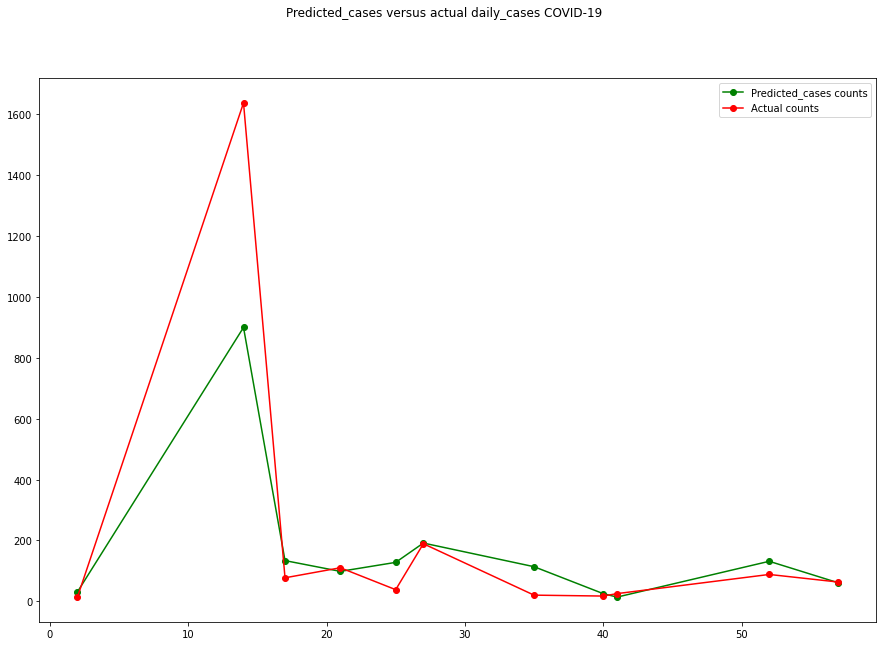

In [213]:
predicted_counts= predictions_summary_frame['mean']
actual_counts = y_test['daily_cases']
fig = plt.figure()
fig.suptitle('Predicted_cases versus actual daily_cases COVID-19')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted_cases counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
fig.set_size_inches(15,10)
plt.show()